In [1]:
import tensorflow as tf
print(tf.__version__)
# tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)
tf.config.list_physical_devices('GPU')

2.6.0


2021-09-23 13:37:40.665849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2021-09-23 13:37:40.674446: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-23 13:37:40.675030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np

# primary_directory = '/content/drive/My Drive/open-kbp'
primary_directory = %pwd
sys.path.insert(0, primary_directory)

# Import provided classes and functions
import shutil
from provided_code.data_loader import DataLoader
from provided_code.dose_evaluation_class import EvaluateDose
from provided_code.general_functions import get_paths, make_directory_and_return_path
from provided_code.network_functions import PredictionModel

In [3]:
# Define parent directory
main_data_dir = '{}/provided-data'.format(primary_directory)
training_data_dir = '{}/train-pats'.format(main_data_dir)
validation_data_dir = '{}/validation-pats'.format(main_data_dir)
testing_data_dir = '{}/test-pats'.format(main_data_dir)

# Define hold out set
test_time = False  # Only change this to True when the model has been fully tuned on the validation set

# path where any data generated by this code (e.g., predictions, models) are stored
results_dir = '{}/results'.format(primary_directory)  # parent path where results are stored


In [4]:
# Prepare the data directory 
training_plan_paths = get_paths(training_data_dir, ext='')  # gets the path of each plan's directory

In [5]:
patient_list = []
patient_path_list = []

i = 10
pat_path = training_plan_paths[i]

data_loader_train = DataLoader([training_plan_paths[i]])

# Get patient ID and location of processed data to load
patient_path_list.append(pat_path)
pat_id = pat_path.split('/')[-1].split('.')[0]
print(">",pat_id)
patient_list.append(pat_id)
# Make a dictionary of all the tensors
loaded_data_dict = data_loader_train.load_and_shape_data(pat_path)


> pt_137


In [9]:
len(patient_path_list)

1

In [6]:
structure_masks = ["brainstem", "spinalcord", "rightparotid", "leftparotid", 
                    "esophagus", "larynx", "mandible", "PTV56", "PTV63", "PTV70"]

slice= 30


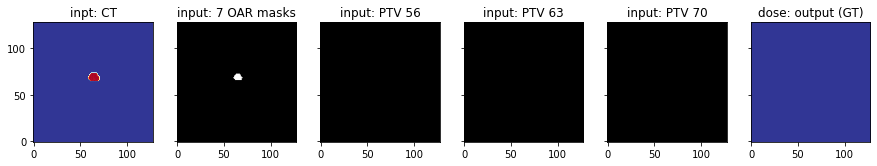

slice= 31


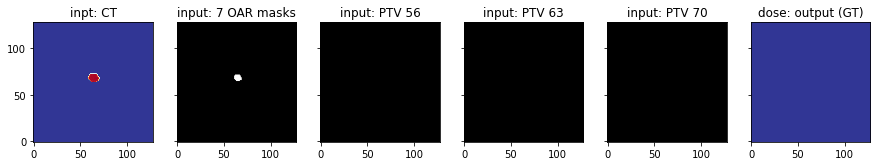

slice= 32


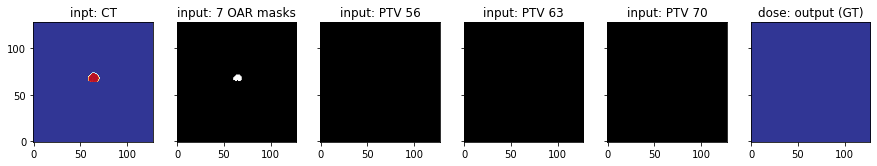

slice= 33


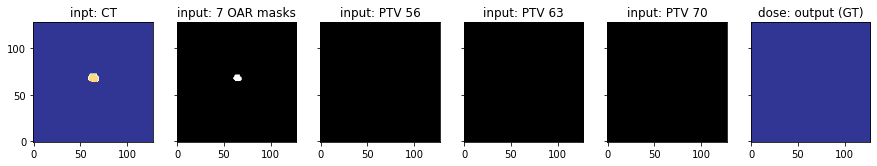

slice= 34


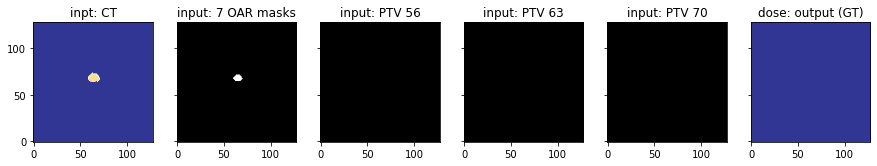

slice= 35


KeyboardInterrupt: 

In [7]:
for slice_ in range(30, 60):
    print("slice=",slice_)
    
       
    unified_masks = np.zeros((128, 128))
    for i, mask in enumerate(structure_masks[:7]):
        unified_masks += loaded_data_dict['structure_masks'][:,:,slice_,i].squeeze()
    unified_masks[unified_masks > 1] = 1
 
    fig, axes = plt.subplots(1, 6, figsize=(15,12),sharey=True)
               
    axes[0].imshow(loaded_data_dict['ct'][:,:,slice_].squeeze(), cmap='RdYlBu_r', origin="lower")
    axes[0].set_title('inpt: CT')
    
    axes[1].imshow(unified_masks, cmap='gray', origin="lower")
    axes[1].set_title('input: 7 OAR masks')
   
    axes[2].imshow(loaded_data_dict['structure_masks'][:,:,slice_,7].squeeze(), cmap='gray', origin="lower")
    axes[2].set_title('input: PTV 56')
    axes[3].imshow(loaded_data_dict['structure_masks'][:,:,slice_,8].squeeze(), cmap='gray', origin="lower")
    axes[3].set_title('input: PTV 63')
    axes[4].imshow(loaded_data_dict['structure_masks'][:,:,slice_,9].squeeze(), cmap='gray', origin="lower")
    axes[4].set_title('input: PTV 70')
    
    axes[5].imshow(loaded_data_dict['dose'][:,:,slice_].squeeze(), cmap='RdYlBu_r', origin="lower")
    axes[5].set_title('dose: output (GT)')
    
    plt.show()

## Train Network:

In [7]:
prediction_name = 'baseline'
number_of_training_epochs = 300
# Prepare the data directory 
training_plan_paths = get_paths(training_data_dir, ext='')  # gets the path of each plan's directory

In [8]:
# Train a model
data_loader_train = DataLoader(training_plan_paths, batch_size=)
dose_prediction_model_train = PredictionModel(data_loader_train, results_dir, model_name=prediction_name)
dose_prediction_model_train.train_model(epochs=number_of_training_epochs, save_frequency=1, keep_model_history=1)

2021-09-23 13:37:54.523729: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-23 13:37:54.524546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-23 13:37:54.525631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-23 13:37:54.526503: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Model: "generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 12 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128, 128, 12 0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 128, 128, 128 0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 64, 64, 64, 1 704         concatenate[0][0]        

  0%|          | 0/100 [00:00<?, ?it/s]2021-09-23 13:37:56.393057: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 167772160 exceeds 10% of free system memory.
2021-09-23 13:37:56.596687: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 167772160 exceeds 10% of free system memory.
2021-09-23 13:37:56.739338: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 167772160 exceeds 10% of free system memory.
2021-09-23 13:37:57.770080: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-23 13:37:59.057994: E tensorflow/stream_executor/cuda/cuda_dnn.cc:362] Loaded runtime CuDNN library: 8.0.5 but source was compiled with: 8.1.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with th

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node generator/conv3d/Conv3D (defined at home/jupyter/radnet/open-kbp/provided_code/network_functions.py:157) ]] [Op:__inference_train_function_2802]

Function call stack:
train_function


In [ ]:
prediction_name = 'baseline'
number_of_training_epochs = 50

# Predict dose for the held out set
hold_out_plan_paths = get_paths(validation_data_dir, ext='')  # list of paths used for held out validation
stage_name = 'hold-out-validation'

data_loader_hold_out = DataLoader(hold_out_plan_paths, mode_name='dose_prediction')
dose_prediction_model_hold_out = PredictionModel(data_loader_hold_out, results_dir,
                                                 model_name=prediction_name, stage=stage_name)
dose_pred_gy = dose_prediction_model_hold_out.predict_dose(epoch=number_of_training_epochs)
dose_pred_gy = dose_pred_gy.squeeze()

for i in range(50, 60):
    print("slice = %s" %i)
    plt.imshow(dose_pred_gy[:,:,i])
    plt.show()